<a href="https://colab.research.google.com/github/thanadolch/KKU_data_mining/blob/master/Data_base.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [111]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [112]:
import pandas as pd
import os
import datetime as dt
import matplotlib.pyplot as plt


In [113]:
path = '/content/drive/My Drive/DVZ'

In [114]:
PVP = pd.read_excel(os.path.join(path,'PPP.xlsx'))
PVP

,transec_id,product_id,datetime,time,seat_no,sale_vol,sale
0,100001,P1013,2021-01-01,บ่าย,7,3,255
1,100001,P1017,2021-01-01,บ่าย,10,3,150
2,100001,P1005,2021-01-01,บ่าย,18,1,60
3,100002,P1021,2021-01-01,บ่าย,5,2,170
4,100002,P1021,2021-01-01,บ่าย,14,2,170
...,...,...,...,...,...,...,...
6496,100671,P1012,2021-01-31,ดึก,19,2,170
6497,100918,P1009,2021-01-31,ดึก,18,2,120
6498,100450,P1001,2021-01-31,ดึก,15,3,135
6499,100594,P1006,2021-01-31,ดึก,1,1,60


In [115]:
PVP['TIME'] = PVP['time'].map({"บ่าย":1,"เย็น":2,"ดึก":3})
PVP

,transec_id,product_id,datetime,time,seat_no,sale_vol,sale,TIME
0,100001,P1013,2021-01-01,บ่าย,7,3,255,1
1,100001,P1017,2021-01-01,บ่าย,10,3,150,1
2,100001,P1005,2021-01-01,บ่าย,18,1,60,1
3,100002,P1021,2021-01-01,บ่าย,5,2,170,1
4,100002,P1021,2021-01-01,บ่าย,14,2,170,1
...,...,...,...,...,...,...,...,...
6496,100671,P1012,2021-01-31,ดึก,19,2,170,3
6497,100918,P1009,2021-01-31,ดึก,18,2,120,3
6498,100450,P1001,2021-01-31,ดึก,15,3,135,3
6499,100594,P1006,2021-01-31,ดึก,1,1,60,3


In [116]:
!pip install apyori

In [117]:
from apyori import apriori

In [118]:
type(PVP.iloc[0,3])

str

In [119]:
accosiation = PVP.groupby('transec_id')['product_id'].apply(list)
list(apriori(accosiation,min_support=0.1,min_confidence=0.49))

[RelationRecord(items=frozenset({'P1011', 'P1004'}), support=0.17255297679112008, ordered_statistics=[OrderedStatistic(items_base=frozenset({'P1011'}), items_add=frozenset({'P1004'}), confidence=0.49709302325581395, lift=1.2828624636627908)])]

In [120]:
X = PVP[['TIME','sale']]

In [121]:
from sklearn.cluster import KMeans

In [122]:
KMcluster = KMeans(n_clusters=4)

In [123]:
KMcluster.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [124]:
label = KMcluster.predict(X)

In [125]:
PVP['cluster'] = KMcluster.predict(X)
PVP

,transec_id,product_id,datetime,time,seat_no,sale_vol,sale,TIME,cluster
0,100001,P1013,2021-01-01,บ่าย,7,3,255,1,2
1,100001,P1017,2021-01-01,บ่าย,10,3,150,1,3
2,100001,P1005,2021-01-01,บ่าย,18,1,60,1,0
3,100002,P1021,2021-01-01,บ่าย,5,2,170,1,3
4,100002,P1021,2021-01-01,บ่าย,14,2,170,1,3
...,...,...,...,...,...,...,...,...,...
6496,100671,P1012,2021-01-31,ดึก,19,2,170,3,3
6497,100918,P1009,2021-01-31,ดึก,18,2,120,3,1
6498,100450,P1001,2021-01-31,ดึก,15,3,135,3,1
6499,100594,P1006,2021-01-31,ดึก,1,1,60,3,0


In [126]:
PVP.groupby('cluster').describe()


transec_id                                       ... TIME               
             count           mean         std       min  ...  25%  50%  75%  max
cluster                                                  ...                    
0           2101.0  100581.441694  256.369330  100001.0  ...  1.0  2.0  3.0  3.0
1           2270.0  100566.814537  263.509911  100002.0  ...  1.0  2.0  3.0  3.0
2            363.0  100536.561983  276.521503  100001.0  ...  1.0  2.0  3.0  3.0
3           1767.0  100589.076967  259.603565  100001.0  ...  1.0  2.0  3.0  3.0

[4 rows x 40 columns]

In [127]:
from sklearn.decomposition import PCA

In [128]:
pca = PCA()

In [129]:
new_pca = pca.fit_transform(X.iloc[:,:-1])
pca.explained_variance_ratio_

array([1.])

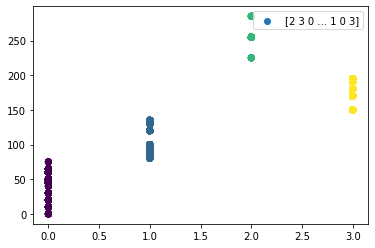

In [130]:
plt.scatter(PVP['cluster'],PVP['sale'],c=label,label=label)
plt.legend()

In [131]:
afternoon = PVP[PVP['time'] == 'บ่าย']
afternoon

,transec_id,product_id,datetime,time,seat_no,sale_vol,sale,TIME,cluster
0,100001,P1013,2021-01-01,บ่าย,7,3,255,1,2
1,100001,P1017,2021-01-01,บ่าย,10,3,150,1,3
2,100001,P1005,2021-01-01,บ่าย,18,1,60,1,0
3,100002,P1021,2021-01-01,บ่าย,5,2,170,1,3
4,100002,P1021,2021-01-01,บ่าย,14,2,170,1,3
...,...,...,...,...,...,...,...,...,...
6449,100408,P1011,2021-01-31,บ่าย,13,1,10,1,0
6450,100709,P1009,2021-01-31,บ่าย,4,2,120,1,1
6451,100913,P1010,2021-01-31,บ่าย,13,2,130,1,1
6452,100473,P1003,2021-01-31,บ่าย,17,2,100,1,1


In [132]:
accosiation_A = afternoon.groupby('transec_id')['product_id'].apply(list)
list(apriori(accosiation_E,min_support=0.05,min_confidence=0.27))

[]

In [133]:
evening = PVP[PVP['time'] == 'เย็น']
evening

,transec_id,product_id,datetime,time,seat_no,sale_vol,sale,TIME,cluster
44,100015,P1012,2021-01-02,เย็น,17,2,170,2,3
45,100015,P1027,2021-01-02,เย็น,8,1,50,2,0
46,100015,P1025,2021-01-02,เย็น,13,2,100,2,1
47,100015,P1017,2021-01-02,เย็น,20,2,100,2,1
48,100016,P1012,2021-01-02,เย็น,20,3,255,2,2
...,...,...,...,...,...,...,...,...,...
6475,100502,P1004,2021-01-31,เย็น,6,3,150,2,3
6476,100592,P1013,2021-01-31,เย็น,17,2,170,2,3
6477,100405,P1006,2021-01-31,เย็น,20,1,60,2,0
6478,100563,P1001,2021-01-31,เย็น,1,2,90,2,1


In [134]:
accosiation_E = evening.groupby('transec_id')['product_id'].apply(list)
list(apriori(accosiation_E,min_support=0.05,min_confidence=0.05))

[RelationRecord(items=frozenset({'P1001'}), support=0.13193403298350825, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'P1001'}), confidence=0.13193403298350825, lift=1.0)]),
 RelationRecord(items=frozenset({'P1002'}), support=0.16041979010494753, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'P1002'}), confidence=0.16041979010494753, lift=1.0)]),
 RelationRecord(items=frozenset({'P1003'}), support=0.12893553223388307, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'P1003'}), confidence=0.12893553223388307, lift=1.0)]),
 RelationRecord(items=frozenset({'P1004'}), support=0.1619190404797601, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'P1004'}), confidence=0.1619190404797601, lift=1.0)]),
 RelationRecord(items=frozenset({'P1005'}), support=0.15892053973013492, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'P1

In [135]:
nigth = PVP[PVP['time'] == 'ดึก']
nigth

,transec_id,product_id,datetime,time,seat_no,sale_vol,sale,TIME,cluster
70,100023,P1008,2021-01-03,ดึก,9,2,120,3,1
71,100023,P1002,2021-01-03,ดึก,20,3,150,3,3
72,100024,P1012,2021-01-03,ดึก,17,2,170,3,3
73,100024,P1027,2021-01-03,ดึก,1,3,150,3,3
74,100024,P1022,2021-01-03,ดึก,16,2,80,3,1
...,...,...,...,...,...,...,...,...,...
6496,100671,P1012,2021-01-31,ดึก,19,2,170,3,3
6497,100918,P1009,2021-01-31,ดึก,18,2,120,3,1
6498,100450,P1001,2021-01-31,ดึก,15,3,135,3,1
6499,100594,P1006,2021-01-31,ดึก,1,1,60,3,0


In [136]:
accosiation_N = nigth.groupby('transec_id')['product_id'].apply(list)
list(apriori(accosiation_E,min_support=0.029,min_confidence=0.029))

[RelationRecord(items=frozenset({'P1001'}), support=0.13193403298350825, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'P1001'}), confidence=0.13193403298350825, lift=1.0)]),
 RelationRecord(items=frozenset({'P1002'}), support=0.16041979010494753, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'P1002'}), confidence=0.16041979010494753, lift=1.0)]),
 RelationRecord(items=frozenset({'P1003'}), support=0.12893553223388307, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'P1003'}), confidence=0.12893553223388307, lift=1.0)]),
 RelationRecord(items=frozenset({'P1004'}), support=0.1619190404797601, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'P1004'}), confidence=0.1619190404797601, lift=1.0)]),
 RelationRecord(items=frozenset({'P1005'}), support=0.15892053973013492, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'P1